# Quantum Teleportation - example

## Installing packages:

In [25]:
! pip install pylatexenc
! pip install qiskit
! pip install qiskit_aer
! pip install matplotlib

In [20]:
%matplotlib inline

In [72]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import numpy as np

## Setting up our teleportation circuit

In [73]:
# Step 1: Create the quantum circuit
qc = QuantumCircuit(3, 3)

# Step 2: Initialize the state to be teleported
input_state = [0.6, 0.8]  # Example state |ψ> = 0.6|0> + 0.8|1>
qc.initialize(input_state, 0)

# Step 3: Create the entanglement between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

qc.barrier()

# Step 4: Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Step 5: Measure qubits 0 and 1
qc.measure(0, 0)
qc.measure(1, 1)

# Step 6: Apply corrections based on the measurement results
qc.cx(1, 2)
qc.cz(0, 2)

qc.measure(2, 2)

## Drawing the circuit

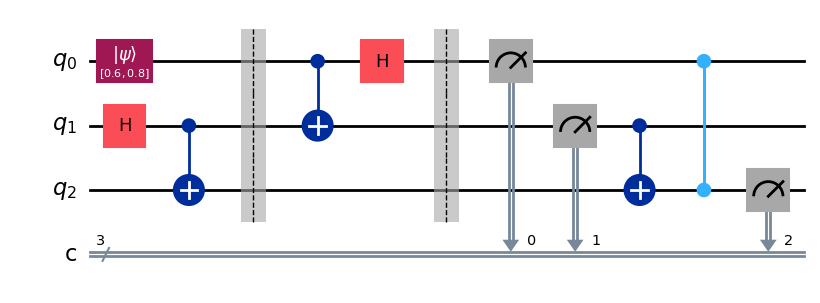

In [74]:
# Visualize the circuit
qc.draw('mpl')

## Simulating the circuit using QASM (Quantum Assembly) simulator

In [0]:
# Step 7: Simulate the circuit
backend_qasm = Aer.get_backend('qasm_simulator')

compiled_qc = transpile(qc, backend_qasm)
result_qasm = backend_qasm.run(compiled_qc, shots=10000).result()
counts = result_qasm.get_counts()

### Plotting the results

Accumulated counts: {'0': 3542, '1': 6458}
Proportions: {'0': 0.3542, '1': 0.6458}


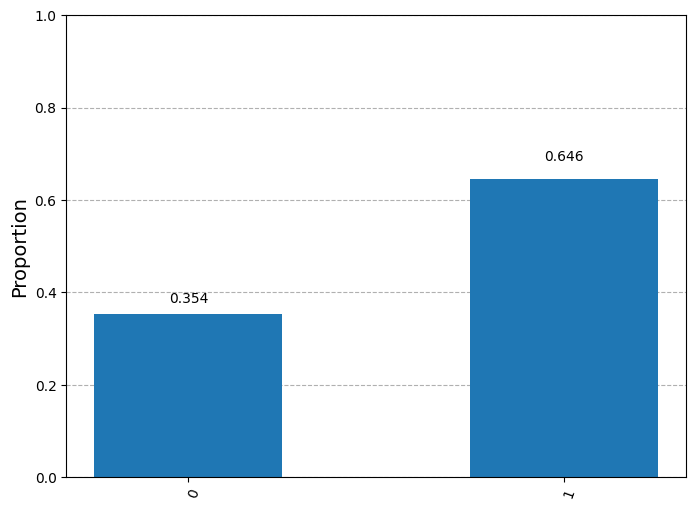

In [78]:
# Accumulate counts based on the most significant bit (MSB)
accumulated_counts = {'0': 0, '1': 0}
for key, value in counts.items():
    msb = key[0]  # Get the most significant bit
    accumulated_counts[msb] += value

# Print the accumulated counts
print("Accumulated counts:", accumulated_counts)

# Calculate total counts
total_counts = sum(accumulated_counts.values())

# Convert counts to proportions
proportions = {key: value / total_counts for key, value in accumulated_counts.items()}

# Print the proportions
print("Proportions:", proportions)

# Plot the proportions
plot_histogram(proportions, figsize=(8, 6))

# Set y-axis range from 0 to 1
plt.ylim(0, 1)
plt.ylabel('Proportion')
plt.show()

## State vector simulation

In [85]:
# Step 1: Create the quantum circuit
qc = QuantumCircuit(3, 3)

# Step 2: Initialize the state to be teleported
input_state = [0.6, 0.8]  # Example state |ψ> = 0.6|0> + 0.8|1>
qc.initialize(input_state, 0)

# Step 3: Create the entanglement between qubit 1 and qubit 2
qc.h(1)
qc.cx(1, 2)

qc.barrier()

# Step 4: Bell measurement on qubit 0 and qubit 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Step 5: Measure qubits 0 and 1
qc.measure(0, 0)
qc.measure(1, 1)

# Step 6: Apply corrections based on the measurement results
qc.cx(1, 2)
qc.cz(0, 2)

# qc.measure(2, 2) # Notice I removed the "measeure" here since we want to look at the statevector before measurement!

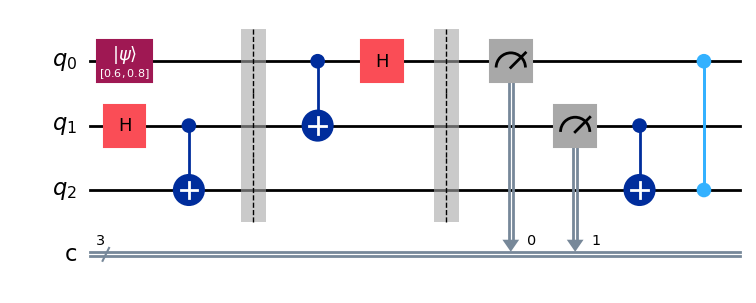

In [86]:
# Visualize the circuit
qc.draw('mpl')

In [87]:
# Step 7: Simulate the circuit
backend = Aer.get_backend('statevector_simulator')

compiled_qc = transpile(qc, backend)
result = backend.run(compiled_qc, shots=128).result()

# result = execute(qc, backend).result()
output_state = Statevector(result.get_statevector(qc))

# Get the statevector before and after the teleportation
input_sv = Statevector(input_state)
output_sv = output_state

# Compare input and output statevectors
print(f"Input Statevector: {input_sv}")
print(f"Output Statevector: {output_sv}")

Input Statevector: Statevector([0.6+0.j, 0.8+0.j],
            dims=(2,))
Output Statevector: Statevector([0. +0.00000000e+00j, 0. +0.00000000e+00j, 0.6+0.00000000e+00j,
             0. +0.00000000e+00j, 0. +0.00000000e+00j, 0. -0.00000000e+00j,
             0.8-9.79717439e-17j, 0. -0.00000000e+00j],
            dims=(2, 2, 2))


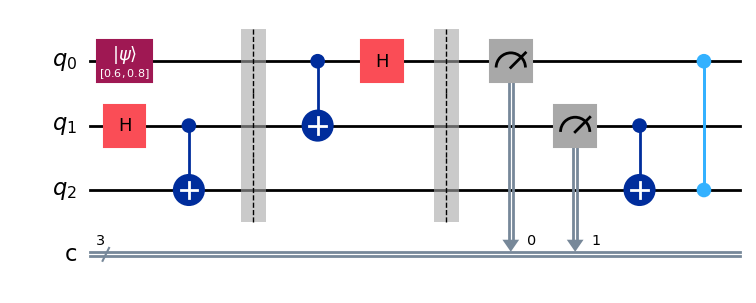

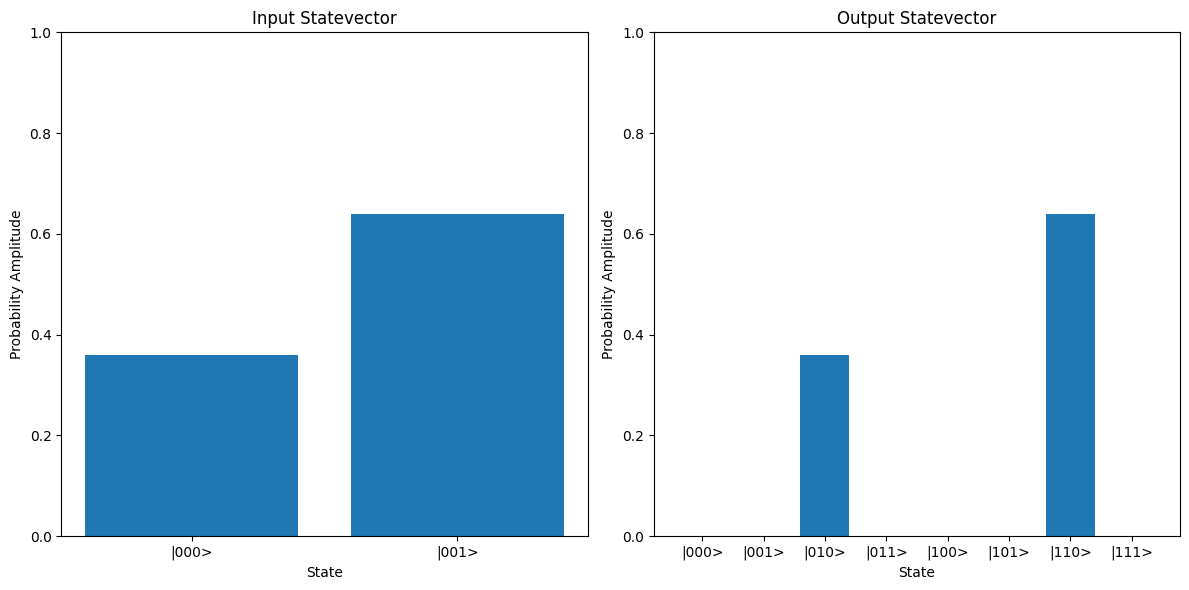

In [88]:
# Plot the amplitudes of the input and output statevectors
def plot_amplitudes(statevector, title):
    amplitudes = np.abs(statevector.data) ** 2
    plt.bar(range(len(amplitudes)), amplitudes)
    plt.xlabel('State')
    plt.ylabel('Probability Amplitude')
    plt.title(title)
    plt.xticks(range(len(amplitudes)), [f'|{i:03b}>' for i in range(len(amplitudes))])
    plt.ylim(0, 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_amplitudes(input_sv, 'Input Statevector')

plt.subplot(1, 2, 2)
plot_amplitudes(output_sv, 'Output Statevector')

plt.tight_layout()
plt.show()